# Scraping product reviews from a website and analyze the **reviews**

In [4]:
import pandas as pd
from lxml import html  
import requests
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
amazon_url = 'https://www.amazon.in/dp/B07HGH8D2R/ref=gwdb_bmc_2_CP_Latest_SamsungM21?pf_rd_s=merchandised-search-5&pf_rd_t=Gateway&pf_rd_i=mobile&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_r=74TGTZCE9VE1W99Y001F&pf_rd_p=0ea396e8-7e7b-46af-996e-db2ee977f5d8'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'

In [0]:
headers = {'User-Agent': user_agent}
page = requests.get(amazon_url, headers = headers)
parser = html.fromstring(page.content)

In [0]:
xpath_reviews = '//div[@data-hook="review"]'
reviews = parser.xpath(xpath_reviews)

In [0]:
xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
xpath_title   = './/a[@data-hook="review-title"]//text()'
xpath_author  = './/span[contains(@class,"profile-name")]//text()'
xpath_date    = './/span[@data-hook="review-date"]//text()'
xpath_body    = './/span[@data-hook="review-body"]//text()'
xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

In [0]:
reviews_df = pd.DataFrame()

In [0]:
for review in reviews:
    rating  = review.xpath(xpath_rating)
    title   = review.xpath(xpath_title)
    author  = review.xpath(xpath_author)
    date    = review.xpath(xpath_date)
    body    = review.xpath(xpath_body)
    helpful = review.xpath(xpath_helpful)
    review_dict = {'rating': rating,
                   'title': title,
                   'author': author,             
                   'date': date,
                   'body': body,
                   'helpful': helpful}
    reviews_df = reviews_df.append(review_dict, ignore_index=True)

In [11]:
reviews_df.head(20)

,author,body,date,helpful,rating,title
0,[Amritraj Kaur],"[\n\n\n\n\n\n\n\n \n \n , I have ordered ...",[Reviewed in India on 16 May 2020],[737 people found this helpful],[2.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Highly disappoi..."
1,[Ganapam Venkateswara Reddy],"[\n\n\n\n\n\n\n\n \n \n , I love this one...",[Reviewed in India on 13 April 2020],[330 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , More than 5star..."
2,[Rakesh s.],"[\n\n\n\n\n\n\n\n \n \n , As a title it i...",[Reviewed in India on 19 April 2020],[255 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , ❤️❤️❤️❤️, \n \n]"
3,[Rupa Ray],"[\n\n\n\n\n\n\n\n \n \n , Brilliant camer...",[Reviewed in India on 11 May 2020],[206 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Best Budget Pho..."
4,[Nasayam ],"[\n\n\n\n\n\n\n\n \n \n , Just one word A...",[Reviewed in India on 18 April 2020],[200 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Amazon is amazi..."
5,[Cv Vineeth],"[\n\n\n\n\n\n\n\n \n \n , Review after 3 ...",[Reviewed in India on 12 May 2020],[112 people found this helpful],[4.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Value For Money..."
6,[Nikhil],"[\n\n\n\n\n\n\n\n \n \n , Value for money...",[Reviewed in India on 13 May 2020],[79 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Worth it (Non g..."
7,[Ravi Kumar],"[\n\n\n\n\n\n\n\n \n \n , I am writing my...",[Reviewed in India on 15 May 2020],[77 people found this helpful],[3.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Battery life is..."


In [0]:
corpus = []
for i in range(0, len(reviews_df['body'])):
    review = re.sub('[^a-zA-Z]', ' ', str(reviews_df['body'][i]))
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus

['n n n n n n n n n n ordered product th may received th may usb cable charger faulty cap tip loose almost ended getting electric shock removing charging called customer care customer care associate prem getting bothered calls seeking exchange usb cable get satisfactory solution hence writing review highly disappointed amazons customer care department though regular customer didnt expect sort sales service n n read',
 'n n n n n n n n n n love one best class best budget mobile samsung mobile brand also global brand world great one rating star thanks samsung n amazon n n read',
 'n n n n n n n n n n title obviously monster good performance n n read',
 'n n n n n n n n n n brilliant camera huge battery life brilliant display addition premium feeling samsung shame phone launch delayed due lockdown highly recommended phone n n read',
 'n n n n n n n n n n one word amazing n n read',
 'n n n n n n n n n n review day battery two day battery standby normal easy display super amaload full hd s

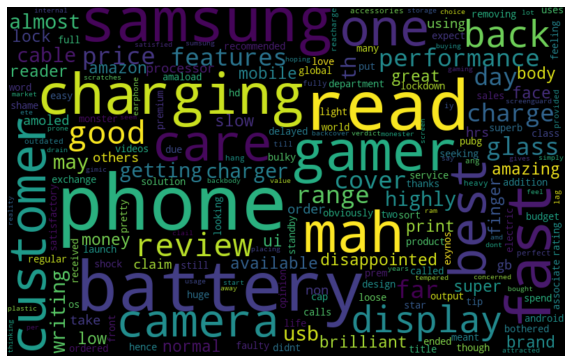

In [14]:
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()